In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from train_utils import train, test
import matplotlib.pyplot as plt
from test_fun import train,test,main

In [2]:
train_dataset = datasets.CIFAR10('./data/cifar', train=True, 
                                download=False,
                                transform=transforms.ToTensor())
test_dataset = datasets.CIFAR10('./data/cifar', train=False,
                               transform=transforms.ToTensor())

print("training set:{},test set:{}\n".format(
    len(train_dataset),len(test_dataset)))

training set:50000,test set:10000



Target:plane
Size of Image:torch.Size([3, 32, 32])


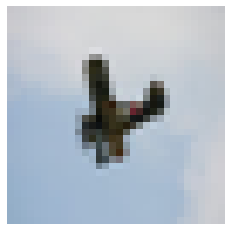

In [3]:
classes = ('plane','car','bird','cat','deer',
          'dog','frog','horse','ship','truck')

idx = torch.randint(0,len(train_dataset),(1,)).item()
random_image = train_dataset[idx][0]
target_num = train_dataset[idx][1]

print('Target:{}'.format(classes[target_num]))
print('Size of Image:{}'.format(random_image.size()))

plt.imshow(random_image.numpy().transpose(1,2,0))
plt.axis("off")
plt.show()

In [4]:
BATCH = 128
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)
STEP = 50
PRINT_STEP = 180

cuda


In [5]:
train_loader = DataLoader(train_dataset,batch_size=BATCH,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=BATCH,shuffle=True)

In [28]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

In [29]:
model = AlexNet(10).to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [30]:
model.parameters

<bound method Module.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inpla

In [31]:
num_params = 0 
for params in model.parameters():
    num_params += params.view(-1).size(0)
print('Total number of parameters:{}'.format(num_params))

Total number of parameters:23272266


In [32]:
main(model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    loss_func=loss_function,
    optimizer=optimizer,
    n_step=STEP,
    device=DEVICE,
    save_path='AlexNet_model.pt',
    print_step=PRINT_STEP)

Train Step: 1 (00.00%)  	Loss: 2.3027
Train Step: 1 (46.08%)  	Loss: 1.8058
Train Step: 1 (92.16%)  	Loss: 1.5497
Test Set: Average loss:1.5624,Accuracy:4232/10000(42.32%)

Train Step: 2 (00.00%)  	Loss: 1.5467
Train Step: 2 (46.08%)  	Loss: 1.4159
Train Step: 2 (92.16%)  	Loss: 1.3520
Test Set: Average loss:1.2589,Accuracy:5451/10000(54.51%)
discard previous state, best model state saved!

Train Step: 3 (00.00%)  	Loss: 1.2644
Train Step: 3 (46.08%)  	Loss: 1.1662
Train Step: 3 (92.16%)  	Loss: 1.1432
Test Set: Average loss:1.1783,Accuracy:5895/10000(58.95%)
discard previous state, best model state saved!

Train Step: 4 (00.00%)  	Loss: 1.0250
Train Step: 4 (46.08%)  	Loss: 1.3104
Train Step: 4 (92.16%)  	Loss: 0.9245
Test Set: Average loss:1.1018,Accuracy:6102/10000(61.02%)
discard previous state, best model state saved!

Train Step: 5 (00.00%)  	Loss: 0.9894
Train Step: 5 (46.08%)  	Loss: 1.3780
Train Step: 5 (92.16%)  	Loss: 1.0221
Test Set: Average loss:1.0230,Accuracy:6386/10000(

Train Step: 45 (46.08%)  	Loss: 0.1334
Train Step: 45 (92.16%)  	Loss: 0.0618
Test Set: Average loss:1.9007,Accuracy:6681/10000(66.81%)

Train Step: 46 (00.00%)  	Loss: 0.0977
Train Step: 46 (46.08%)  	Loss: 0.0635
Train Step: 46 (92.16%)  	Loss: 0.1021
Test Set: Average loss:1.7620,Accuracy:6729/10000(67.29%)

Train Step: 47 (00.00%)  	Loss: 0.1106
Train Step: 47 (46.08%)  	Loss: 0.2449
Train Step: 47 (92.16%)  	Loss: 0.1535
Test Set: Average loss:1.8744,Accuracy:6741/10000(67.41%)

Train Step: 48 (00.00%)  	Loss: 0.1695
Train Step: 48 (46.08%)  	Loss: 0.0897
Train Step: 48 (92.16%)  	Loss: 0.1033
Test Set: Average loss:2.1150,Accuracy:6655/10000(66.55%)

Train Step: 49 (00.00%)  	Loss: 0.0393
Train Step: 49 (46.08%)  	Loss: 0.1503
Train Step: 49 (92.16%)  	Loss: 0.1774
Test Set: Average loss:1.9119,Accuracy:6792/10000(67.92%)

Train Step: 50 (00.00%)  	Loss: 0.1144
Train Step: 50 (46.08%)  	Loss: 0.0646
Train Step: 50 (92.16%)  	Loss: 0.0718
Test Set: Average loss:2.0748,Accuracy:668

In [33]:
model_path = './AlexNet_model.pt'
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [34]:
def cal_correct_by_class(model,test_loader,device):
    total = torch.zeros(10)
    correct = torch.zeros(10)
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data.to(device))
            pred = output.cpu().softmax(1).argmax(1)
            correct_idx = pred.masked_select((pred==target))
            correct += torch.zeros(correct_idx.size(0),10)\
                                  .scatter(1,correct_idx.view(-1,1),1).sum(0)
            total += torch.zeros(target.size(0),10).scatter(
                1,target.view(-1,1),1).sum(0)
            
    percentage = correct/total
    return percentage

In [35]:
percentage = cal_correct_by_class(model,test_loader,DEVICE)
for cls_name,percent in zip(classes,percentage):
    print('{} \t:{:05.2f}%'.format(cls_name,percent*100))

plane 	:74.70%
car 	:71.50%
bird 	:57.00%
cat 	:50.20%
deer 	:63.10%
dog 	:53.90%
frog 	:70.60%
horse 	:72.00%
ship 	:86.10%
truck 	:69.00%
